In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset

df = pd.read_csv("vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
df['Year'].fillna(df['Year'].mode()[0], inplace=True)
df['Publisher'].fillna(df['Publisher'].mode()[0], inplace=True)

In [6]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [7]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.448789,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.790533,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# Sales Trends Over Time

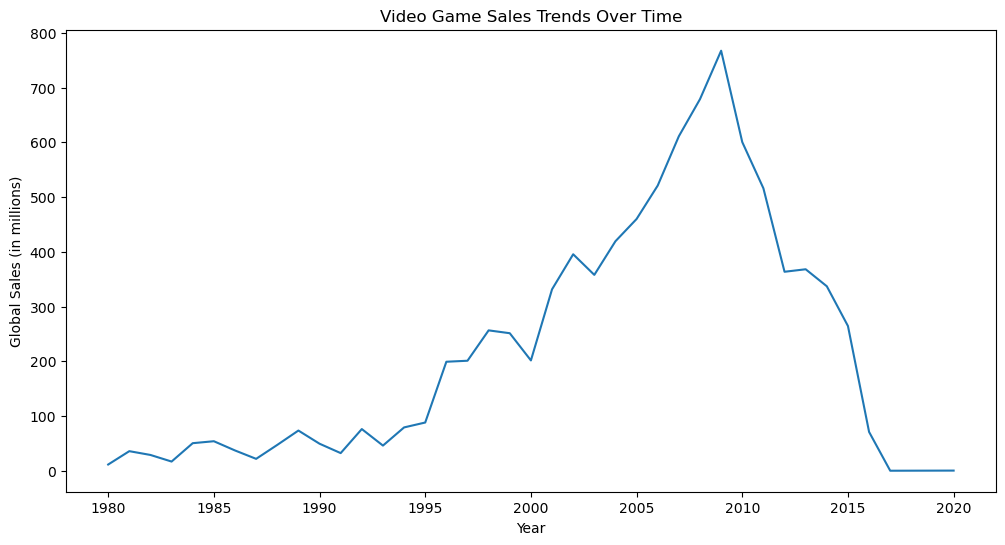

In [8]:
# Group data by year and sum global sales for each year
sales_by_year = df.groupby('Year')['Global_Sales'].sum()

# Create a line plot for sales trends over time
plt.figure(figsize=(12,6))
sns.lineplot(x=sales_by_year.index, y=sales_by_year.values)
plt.ylabel('Global Sales (in millions)')
plt.xlabel('Year')
plt.title('Video Game Sales Trends Over Time')
plt.show()

# Sales By Genre

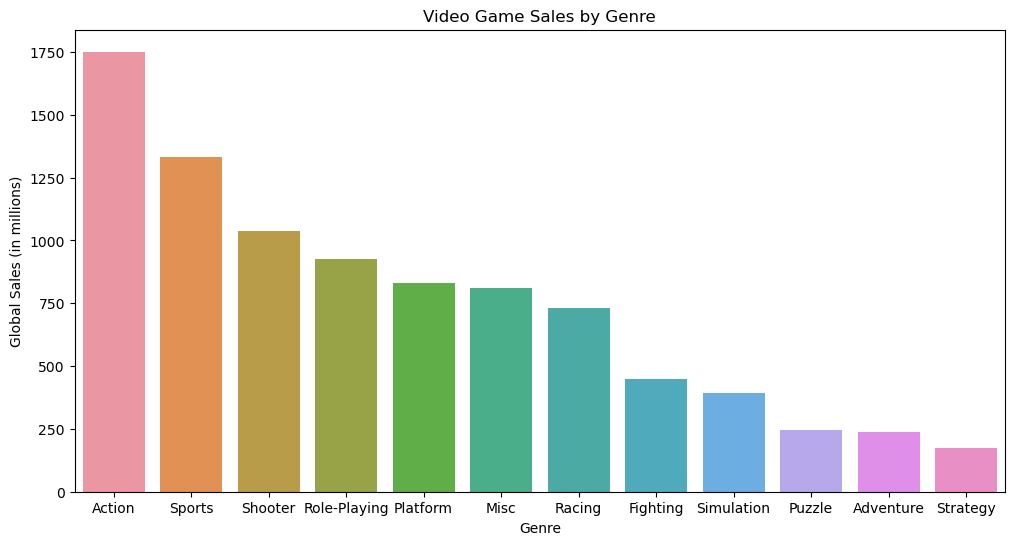

In [16]:
# Group data by genre and sum global sales for each genre
sales_by_genre = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

#Create a bar plot for sales by genre
plt.figure(figsize=(12,6))
sns.barplot(x=sales_by_genre.index, y=sales_by_genre.values)
plt.ylabel('Global Sales (in millions)')
plt.xlabel('Genre')
plt.title('Video Game Sales by Genre')
plt.show()

# Sales by Platform

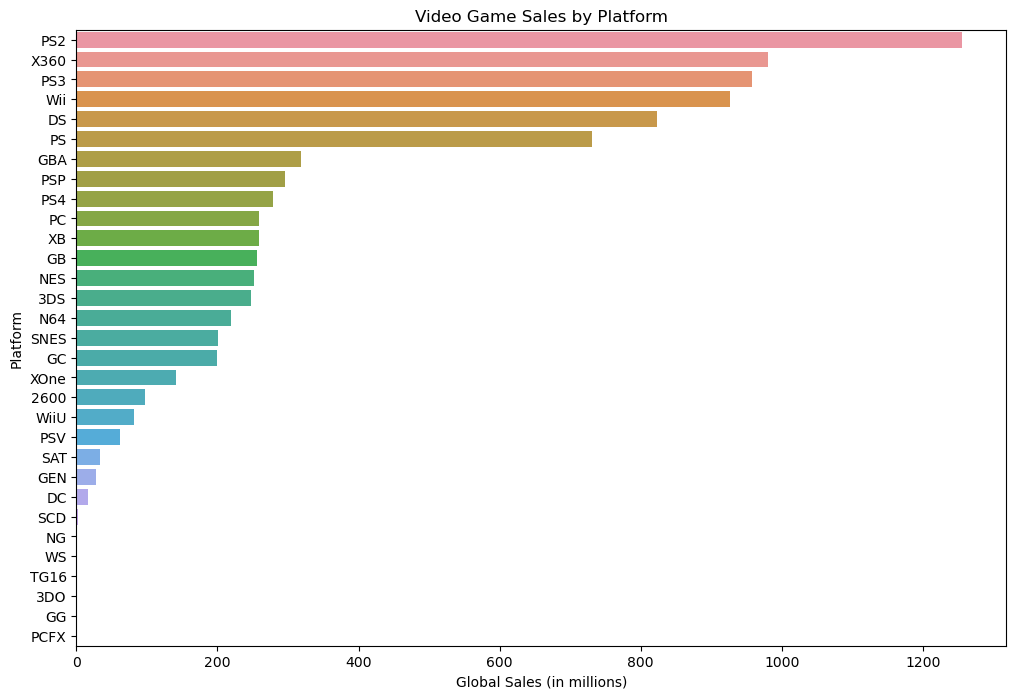

In [10]:
# Group data by platform and sum global sales for each platform
sales_by_platform = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending = False)

#Create a bar plot for sales by platform
plt.figure(figsize=(12,8))
sns.barplot(y=sales_by_platform.index, x=sales_by_platform.values)
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Platform')
plt.title('Video Game Sales by Platform')
plt.show()

# Identify top Genre and Platforms

In [11]:
# Identify top genres
top_genres = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending = False).head()

# Identify top platforms
top_platforms = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending = False).head()

print("\nTop Genres:\n", top_genres)
print("\nTop Plaforms:\n", top_platforms)


Top Genres:
 Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Name: Global_Sales, dtype: float64

Top Plaforms:
 Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
Name: Global_Sales, dtype: float64


# Analyze Genre Success in Specific Regions

              NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action          877.83    525.00    159.95       187.38
Adventure       105.80     64.13     52.07        16.81
Fighting        223.59    101.32     87.35        36.68
Misc            410.24    215.98    107.76        75.32
Platform        447.05    201.63    130.77        51.59
Puzzle          123.78     50.78     57.31        12.55
Racing          359.42    238.39     56.69        77.27
Role-Playing    327.28    188.06    352.31        59.61
Shooter         582.60    313.27     38.28       102.69
Simulation      183.31    113.38     63.70        31.52
Sports          683.35    376.85    135.37       134.97
Strategy         68.70     45.34     49.46        11.36 




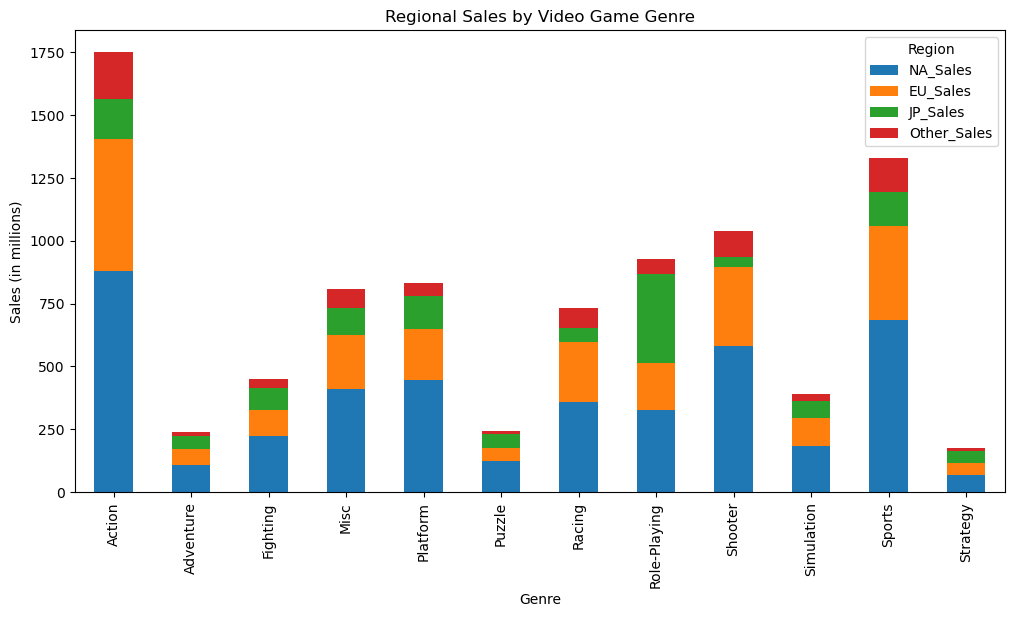

In [12]:
# Group data by genre and sum sales in specific regions
region_sales = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
print(region_sales, '\n\n')

# Create a stacked bar plot to visualize regional sales by genre
region_sales.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Genre')
plt.ylabel('Sales (in millions)')
plt.title('Regional Sales by Video Game Genre')
plt.legend(title='Region')
plt.show()

# Analyze Publisher Performance


 Publisher
Nintendo                        1786.56
Electronic Arts                 1125.20
Activision                       727.46
Sony Computer Entertainment      607.50
Ubisoft                          474.72
Take-Two Interactive             399.54
THQ                              340.77
Konami Digital Entertainment     283.64
Sega                             272.99
Namco Bandai Games               254.09
Name: Global_Sales, dtype: float64 




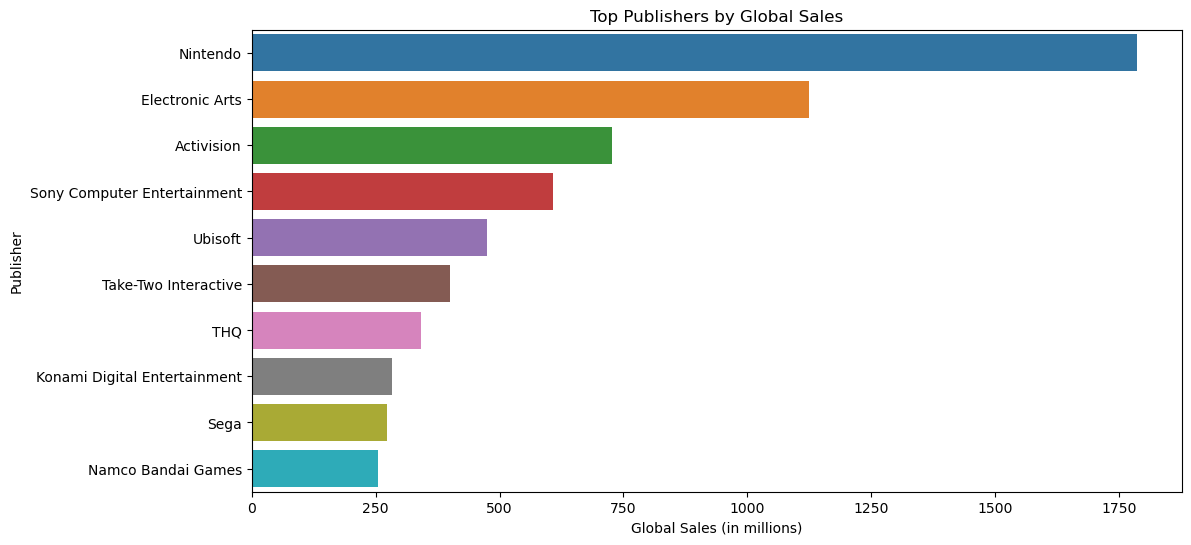

In [13]:
# Group data by publisher and sum global sales for each publisher
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)
print('\n', publisher_sales.head(10), '\n\n')

# Create a bar plot to visualize publisher performance
plt.figure(figsize=(12, 6))
sns.barplot(x=publisher_sales.head(10).values, y=publisher_sales.head(10).index)
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Publisher')
plt.title('Top Publishers by Global Sales')
plt.show()

# Analyze Consistency in Publisher Performance



 Publisher
Palcom                                4.170000
Red Orb                               2.620000
Nintendo                              2.541337
Arena Entertainment                   2.360000
UEP Systems                           2.250000
RedOctane                             2.170000
Valve                                 1.740000
Hello Games                           1.600000
Sony Computer Entertainment Europe    1.592667
Westwood Studios                      1.550000
Name: Global_Sales, dtype: float64 




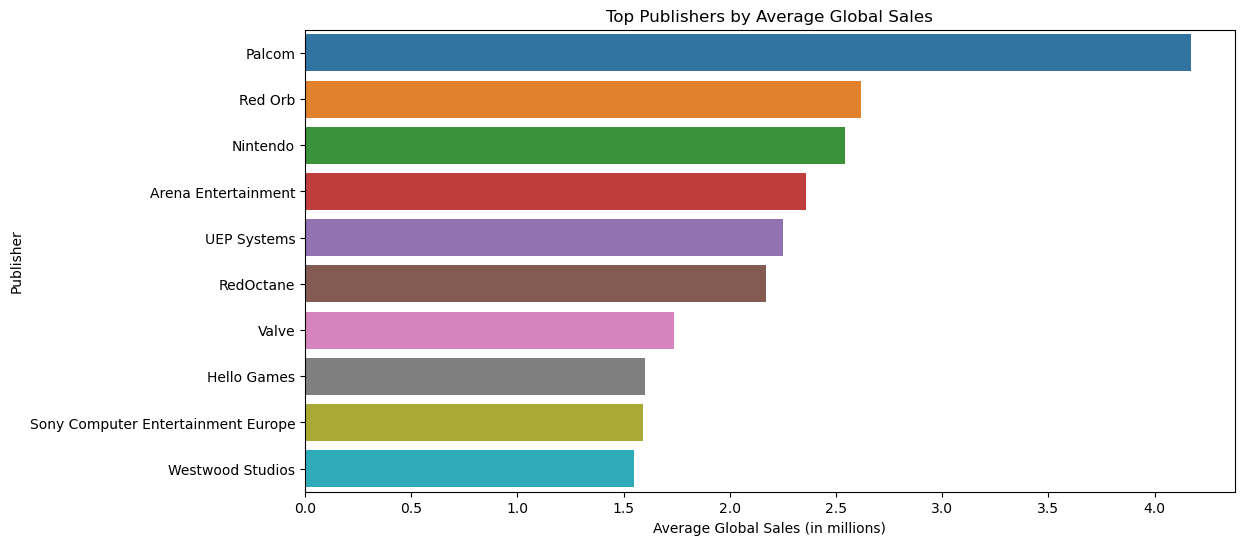

In [14]:
# Calculate the average global sales for each publisher
average_sales_by_publisher = df.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False)
print('\n\n', average_sales_by_publisher.head(10), '\n\n')

# Create a bar plot to visualize average sales by publisher
plt.figure(figsize=(12, 6))
sns.barplot(x=average_sales_by_publisher.head(10).values, y=average_sales_by_publisher.head(10).index)
plt.xlabel('Average Global Sales (in millions)')
plt.ylabel('Publisher')
plt.title('Top Publishers by Average Global Sales')
plt.show()

# Regional Sales Analysis

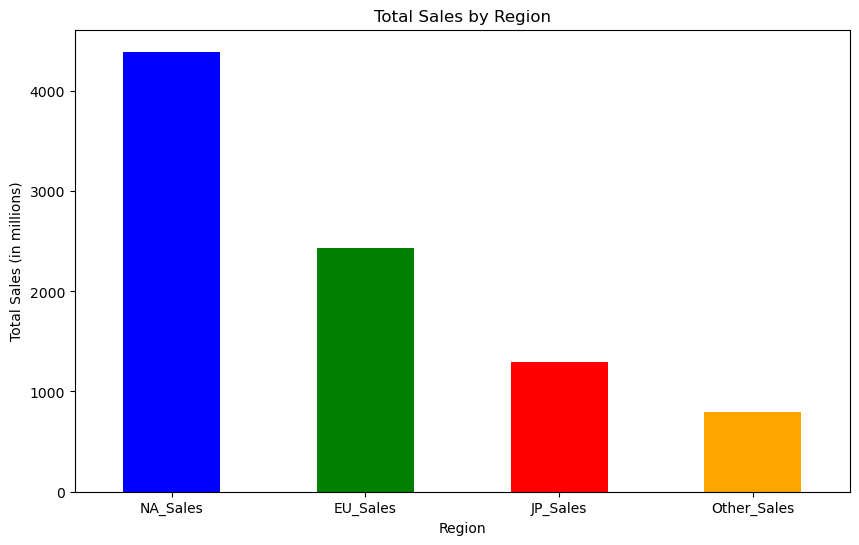

Top 5 Games in North America:
                Name  NA_Sales
0         Wii Sports     41.49
1  Super Mario Bros.     29.08
9          Duck Hunt     26.93
5             Tetris     23.20
2     Mario Kart Wii     15.85

Top 5 Games in Europe:
                  Name  EU_Sales
0           Wii Sports     29.02
2       Mario Kart Wii     12.88
3    Wii Sports Resort     11.01
10          Nintendogs     11.00
16  Grand Theft Auto V      9.27

Top 5 Games in Japan:
                             Name  JP_Sales
4        Pokemon Red/Pokemon Blue     10.22
12    Pokemon Gold/Pokemon Silver      7.20
1               Super Mario Bros.      6.81
6           New Super Mario Bros.      6.50
20  Pokemon Diamond/Pokemon Pearl      6.04

Top 5 Games in Other Regions:
                             Name  Other_Sales
17  Grand Theft Auto: San Andreas        10.57
0                      Wii Sports         8.46
47                 Gran Turismo 4         7.53
16             Grand Theft Auto V         4.14
2        

In [15]:
# Define the regions you want to analyze
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

# Calculate total sales for each region
region_sales = df[regions].sum()

# Visualize regional sales
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Region')
plt.ylabel('Total Sales (in millions)')
plt.title('Total Sales by Region')
plt.xticks(rotation=0)
plt.show()

# Identify games that perform exceptionally well or poorly in specific regions
top_na_games = df.nlargest(5, 'NA_Sales')[['Name', 'NA_Sales']]
top_eu_games = df.nlargest(5, 'EU_Sales')[['Name', 'EU_Sales']]
top_jp_games = df.nlargest(5, 'JP_Sales')[['Name', 'JP_Sales']]
top_other_games = df.nlargest(5, 'Other_Sales')[['Name', 'Other_Sales']]

print("Top 5 Games in North America:")
print(top_na_games)
print("\nTop 5 Games in Europe:")
print(top_eu_games)
print("\nTop 5 Games in Japan:")
print(top_jp_games)
print("\nTop 5 Games in Other Regions:")
print(top_other_games)